# Home Price Index vs S&P500 Index - A Time Series Plot based Analysis

### To run this notebook you need the following libraries: pandas, matplotlib,seaborn and statsmodel.


In [2]:
### Step 1: Load & Describe Datasets (with spacing)

import pandas as pd

# Load datasets
sp500_df = pd.read_csv("data/SP500_fred.csv")
hpi_df = pd.read_csv("data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Describe S&P 500 dataset
print("📈 S&P 500 Dataset Overview:")
print(sp500_df.info())
print("\n")  # Add space between datasets

print(sp500_df.describe())
print("\n")  # Add space between datasets

print(sp500_df.head())
print("\n")  # Add space between datasets

# Describe Zillow HPI dataset
print("🏠 Zillow Home Price Index Dataset Overview:")
print(hpi_df.info())
print("\n")  # Add space between datasets

print(hpi_df.describe(include='all'))
print("\n")  # Add space between datasets

print(hpi_df.head())


📈 S&P 500 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  1305 non-null   object 
 1   SP500             1257 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB
None


             SP500
count  1257.000000
mean   4424.825823
std     775.770480
min    2736.560000
25%    3918.320000
50%    4327.780000
75%    4796.560000
max    6144.150000


  observation_date    SP500
0       2020-04-21  2736.56
1       2020-04-22  2799.31
2       2020-04-23  2797.80
3       2020-04-24  2836.74
4       2020-04-27  2878.48


🏠 Zillow Home Price Index Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 308 entries, RegionID to 2025-03-31
dtypes: float64(303), int64(2), object(3)
memory usage: 2.1+ MB
None


             RegionID    SizeRank  RegionNa

In [3]:
### Step 2: Acknowledge Date Mismatch and Trim Zillow Data (which starts in yr 2000) to Match S&P 500 Start Date 0f 2020

# Convert date in S&P 500 and extract start year
sp500_df['observation_date'] = pd.to_datetime(sp500_df['observation_date'])
sp500_start = sp500_df['observation_date'].min()
print(f"\n🗓️ S&P 500 data starts from: {sp500_start.date()}")

# Identify date columns in Zillow dataset (which are column headers)
date_cols = [col for col in hpi_df.columns if col.startswith("20")]

# Convert column headers to datetime for trimming
zillow_dates = pd.to_datetime(date_cols)
zillow_trim_cols = [col for col in date_cols if pd.to_datetime(col) >= sp500_start]

# Filter HPI dataset to only keep those columns
hpi_filtered = hpi_df[["RegionName"] + zillow_trim_cols]

# Preview filtered HPI dataset
print("\n📆 Zillow HPI columns aligned to S&P 500 timeframe (2020 onward):")
print(hpi_filtered.iloc[:, :5])  # Show first 5 columns including RegionName



🗓️ S&P 500 data starts from: 2020-04-21

📆 Zillow HPI columns aligned to S&P 500 timeframe (2020 onward):
          RegionName     2020-04-30     2020-05-31     2020-06-30  \
0      United States  251344.159112  252097.782609  252522.044954   
1       New York, NY  509766.047687  511627.562813  511969.487284   
2    Los Angeles, CA  686913.801765  685951.374695  683056.591688   
3        Chicago, IL  242750.828329  242844.708073  242381.759484   
4         Dallas, TX  263591.017157  263581.652543  263365.061917   
..               ...            ...            ...            ...   
890       Zapata, TX  145833.311212  146360.269536  147046.469282   
891    Ketchikan, AK  329956.235350  329905.827435  328633.827403   
892        Craig, CO  185127.571716  186416.400703  187155.784439   
893       Vernon, TX   85437.453448   86361.034818   86952.780127   
894       Lamesa, TX  102851.315766  104543.303175  106533.165511   

        2020-07-31  
0    253202.548920  
1    511051.709865  
2

In [4]:
### Step 3: Normalize and Prepare Data for Comparison

# Melt Zillow HPI to long format (RegionName, Date, HPI)
hpi_melted = hpi_filtered.melt(id_vars='RegionName', var_name='Date', value_name='HPI')
hpi_melted['Date'] = pd.to_datetime(hpi_melted['Date'])
hpi_melted.dropna(inplace=True)

# Aggregate HPI across all regions for each date
hpi_avg = hpi_melted.groupby('Date')['HPI'].mean().reset_index()

# Prepare monthly S&P 500 index
sp500_df['YearMonth'] = sp500_df['observation_date'].dt.to_period('M')
sp500_monthly = sp500_df.groupby('YearMonth')['SP500'].mean().reset_index()
sp500_monthly['Date'] = sp500_monthly['YearMonth'].dt.to_timestamp(how='end')
sp500_monthly = sp500_monthly[['Date', 'SP500']]

print(sp500_monthly.head())
print("\n") 
print(hpi_avg.head())

                           Date        SP500
0 2020-04-30 23:59:59.999999999  2845.527500
1 2020-05-31 23:59:59.999999999  2919.615000
2 2020-06-30 23:59:59.999999999  3104.660909
3 2020-07-31 23:59:59.999999999  3207.619091
4 2020-08-31 23:59:59.999999999  3391.710000


        Date            HPI
0 2020-04-30  200744.019502
1 2020-05-31  201551.785761
2 2020-06-30  202025.599113
3 2020-07-31  202684.068330
4 2020-08-31  204181.285034


Step-by-Step EDA: Analyze S&P 500 and Zillow HPI Separately
We'll focus on:

📈 Time series trends

📦 Distributions (box plots)

📊 Monthly returns (optional, later)

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\4158348941.py:14: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


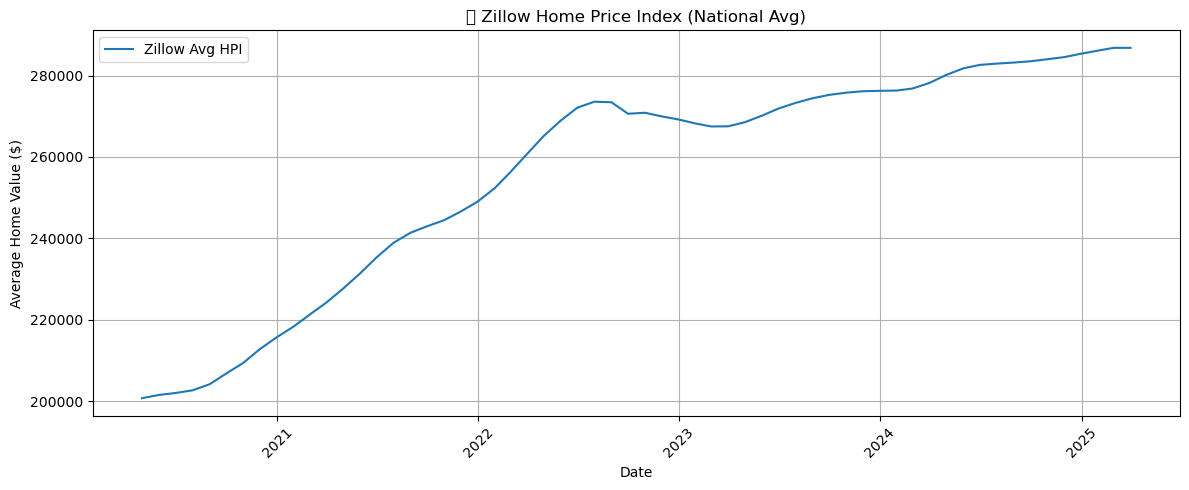

In [5]:
### Explore Zillow HPI Trends (Nationwide Average)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Zillow HPI average trend (already aggregated as hpi_avg)
plt.figure(figsize=(12, 5))
sns.lineplot(data=hpi_avg, x='Date', y='HPI', label='Zillow Avg HPI', color='tab:blue')
plt.title("🏠 Zillow Home Price Index (National Avg)")
plt.ylabel("Average Home Value ($)")
plt.xlabel("Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\3258799445.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


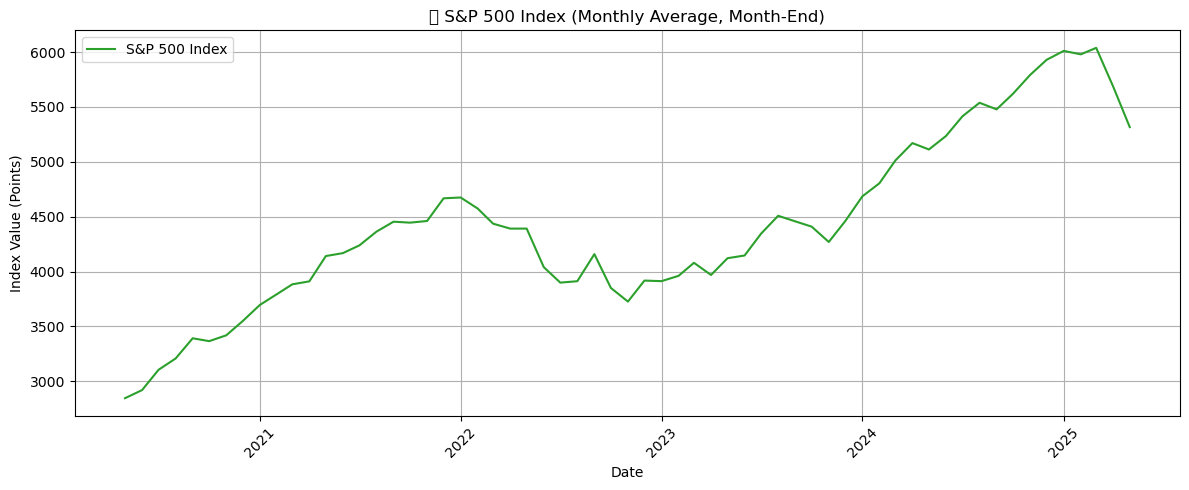

In [6]:
### Explore S&P 500 Trends (Month-End)

# Plot S&P 500 monthly average trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=sp500_monthly, x='Date', y='SP500', label='S&P 500 Index', color='tab:green')
plt.title("📈 S&P 500 Index (Monthly Average, Month-End)")
plt.ylabel("Index Value (Points)")
plt.xlabel("Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\572477637.py:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


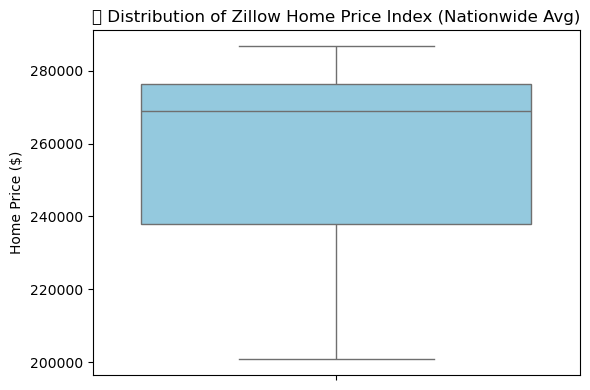

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\572477637.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


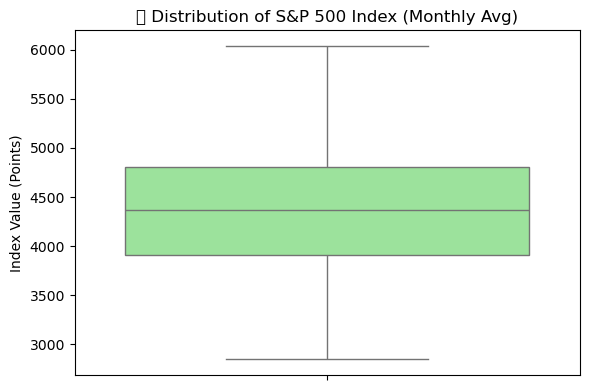

In [7]:
### Box Plots (Distribution Overview)

# Box plot for Zillow HPI
plt.figure(figsize=(6, 4))
sns.boxplot(y=hpi_avg['HPI'], color='skyblue')
plt.title("📦 Distribution of Zillow Home Price Index (Nationwide Avg)")
plt.ylabel("Home Price ($)")
plt.tight_layout()
plt.show()

# Box plot for S&P 500
plt.figure(figsize=(6, 4))
sns.boxplot(y=sp500_monthly['SP500'], color='lightgreen')
plt.title("📦 Distribution of S&P 500 Index (Monthly Avg)")
plt.ylabel("Index Value (Points)")
plt.tight_layout()
plt.show()

These plots let you independently explore:

Long-term growth behavior (trend lines)

Volatility/spread (box plots)

Cycles or smoothness of growth

Let’s now proceed with merging and normalizing the datasets to enable a side-by-side comparison of:

📈 Growth over time

🔁 Relative volatility

💹 Rate of return

In [9]:
### Merge on Matching Month-End Dates

# Re-ensure HPI 'Date' column is aligned to month-end
hpi_avg['Date'] = hpi_avg['Date'].dt.to_period('M').dt.to_timestamp(how='end')

# Re-ensure SP500 'Date' column is aligned to month-end
sp500_monthly['Date'] = sp500_monthly['Date'].dt.to_period('M').dt.to_timestamp(how='end')

# Now merge safely on aligned month-end dates
merged_df = pd.merge(hpi_avg, sp500_monthly, on='Date', how='inner')

# Check result
print("\n🔗 Merged DataFrame after aligning dates to month-end:")
print(merged_df.head())
print(f"✅ Merged shape: {merged_df.shape}")


🔗 Merged DataFrame after aligning dates to month-end:
                           Date            HPI        SP500
0 2020-04-30 23:59:59.999999999  200744.019502  2845.527500
1 2020-05-31 23:59:59.999999999  201551.785761  2919.615000
2 2020-06-30 23:59:59.999999999  202025.599113  3104.660909
3 2020-07-31 23:59:59.999999999  202684.068330  3207.619091
4 2020-08-31 23:59:59.999999999  204181.285034  3391.710000
✅ Merged shape: (60, 3)


In [23]:
### Normalize Both Series to Start at 100

# Ensure merged_df is indexed by date
normalized_df = merged_df.copy()
normalized_df.set_index('Date', inplace=True)

# Normalize both HPI and SP500 to start at 100
normalized_df = normalized_df / normalized_df.iloc[0] * 100

# Preview the normalized dataset
print("\n📏 Normalized Index Values (Base = 100):")
print(normalized_df.head())

# Define the output path
output_path = "data/generated/normalized_zillow_sp500.csv"

# Save the DataFrame
normalized_df.to_csv(output_path, index=False)



📏 Normalized Index Values (Base = 100):
                                      HPI       SP500
Date                                                 
2020-04-30 23:59:59.999999999  100.000000  100.000000
2020-05-31 23:59:59.999999999  100.402386  102.603647
2020-06-30 23:59:59.999999999  100.638415  109.106691
2020-07-31 23:59:59.999999999  100.966429  112.724937
2020-08-31 23:59:59.999999999  101.712263  119.194420


C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\3968009659.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


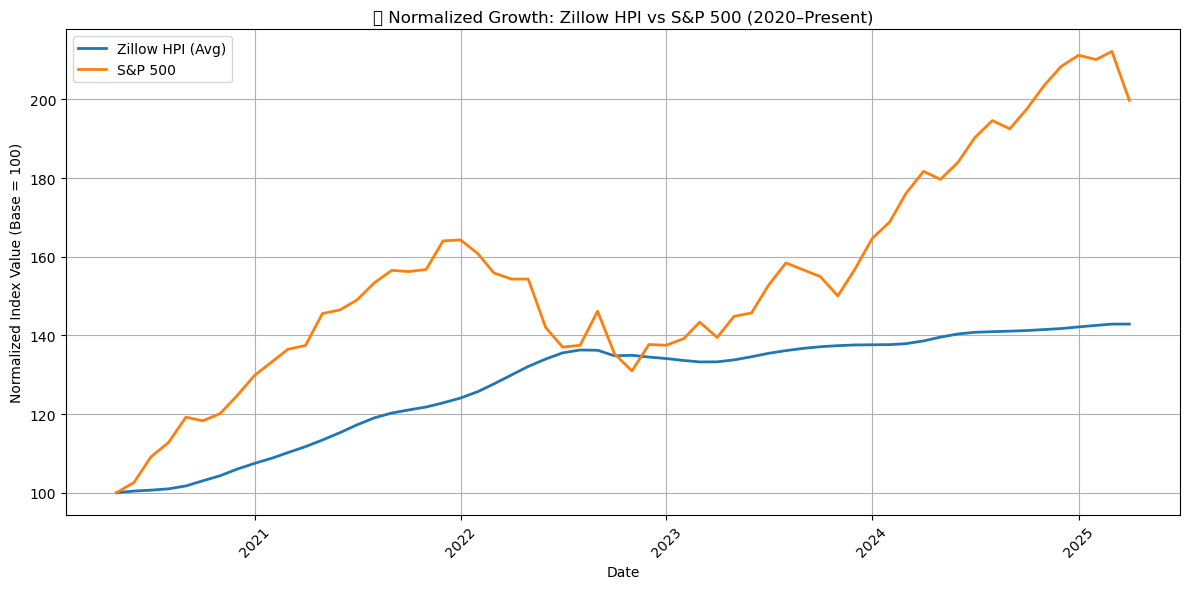

In [13]:
### Time Series Plot for Growth Comparison

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(normalized_df.index, normalized_df['HPI'], label='Zillow HPI (Avg)', linewidth=2)
plt.plot(normalized_df.index, normalized_df['SP500'], label='S&P 500', linewidth=2)
plt.title("📈 Normalized Growth: Zillow HPI vs S&P 500 (2020–Present)")
plt.xlabel("Date")
plt.ylabel("Normalized Index Value (Base = 100)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\3505436328.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=normalized_melt, x='Index', y='Value', palette='Set2')
C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\3505436328.py:13: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


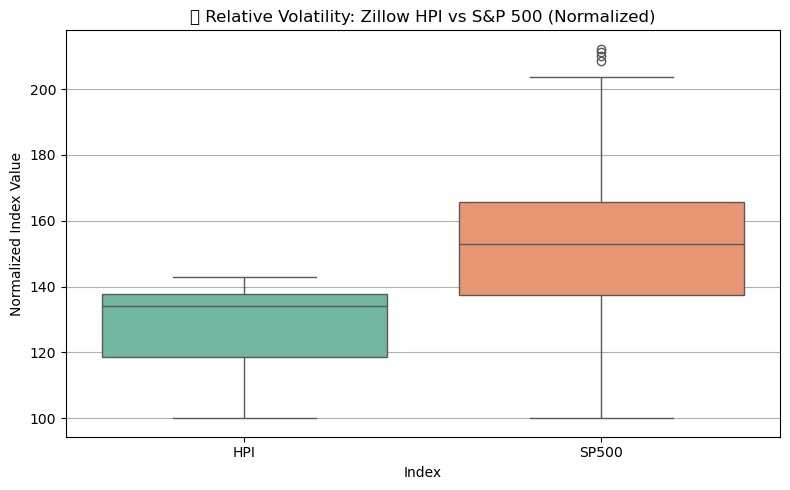

In [14]:
### Box Plot for Relative Volatility

import seaborn as sns

# Prepare long-format data for seaborn boxplot
normalized_melt = normalized_df.reset_index().melt(id_vars='Date', var_name='Index', value_name='Value')

plt.figure(figsize=(8, 5))
sns.boxplot(data=normalized_melt, x='Index', y='Value', palette='Set2')
plt.title("📦 Relative Volatility: Zillow HPI vs S&P 500 (Normalized)")
plt.ylabel("Normalized Index Value")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


📈 Monthly Returns (%):
                                    HPI     SP500
Date                                             
2020-04-30 23:59:59.999999999       NaN       NaN
2020-05-31 23:59:59.999999999  0.402386  2.603647
2020-06-30 23:59:59.999999999  0.235083  6.338024
2020-07-31 23:59:59.999999999  0.325934  3.316246
2020-08-31 23:59:59.999999999  0.738695  5.739176


C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\4101307159.py:20: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


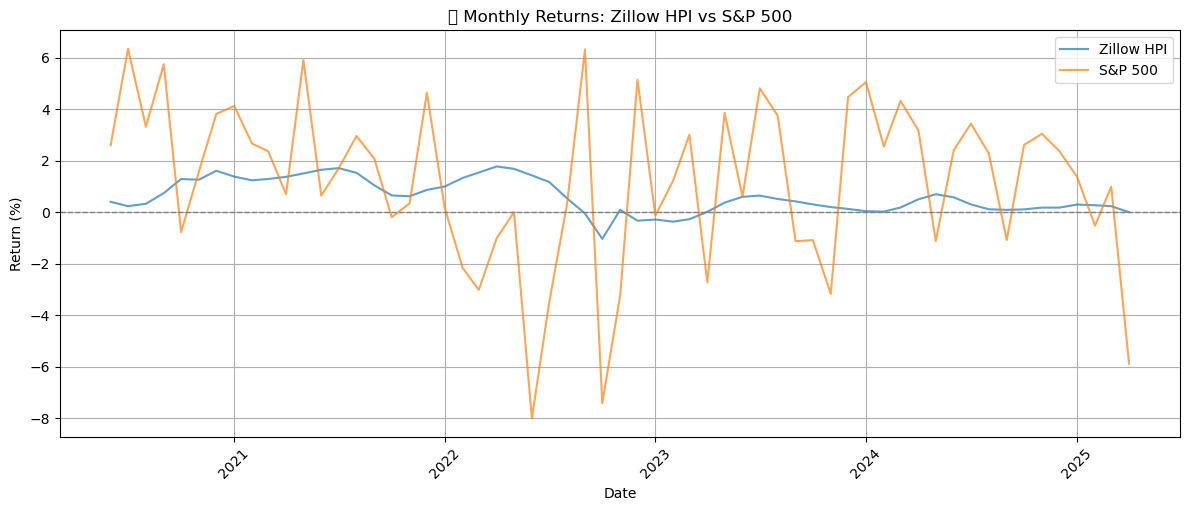

In [16]:
### Calculate Monthly Returns (%) - Volatility, short-term ups/downs

# Monthly percentage returns for HPI and S&P 500
monthly_returns = normalized_df.pct_change() * 100

# Preview returns
print("📈 Monthly Returns (%):")
print(monthly_returns.head())

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_returns.index, monthly_returns['HPI'], label='Zillow HPI', alpha=0.7)
plt.plot(monthly_returns.index, monthly_returns['SP500'], label='S&P 500', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("🔁 Monthly Returns: Zillow HPI vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\2009163829.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


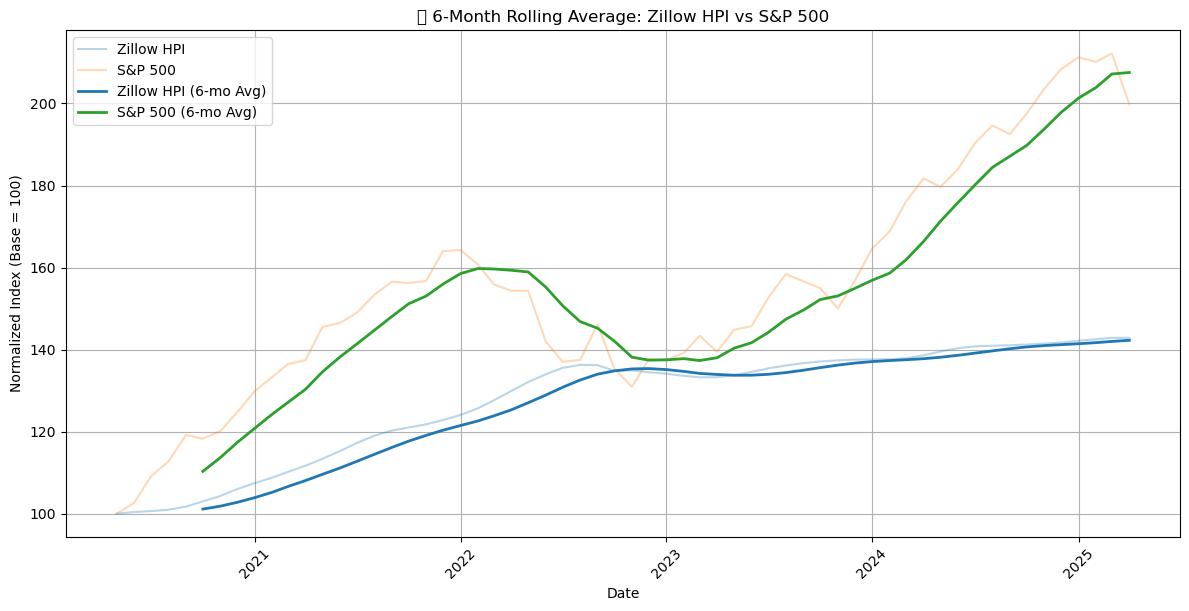

In [17]:
### Add 6-Month Rolling Averages (Smoothed Trend) - Smoothed long-term trend

# 6-month rolling averages
rolling_df = normalized_df.rolling(window=6).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(normalized_df.index, normalized_df['HPI'], label='Zillow HPI', alpha=0.3)
plt.plot(normalized_df.index, normalized_df['SP500'], label='S&P 500', alpha=0.3)
plt.plot(rolling_df.index, rolling_df['HPI'], label='Zillow HPI (6-mo Avg)', linewidth=2, color='tab:blue')
plt.plot(rolling_df.index, rolling_df['SP500'], label='S&P 500 (6-mo Avg)', linewidth=2, color='tab:green')
plt.title("📊 6-Month Rolling Average: Zillow HPI vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Normalized Index (Base = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\3839061957.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


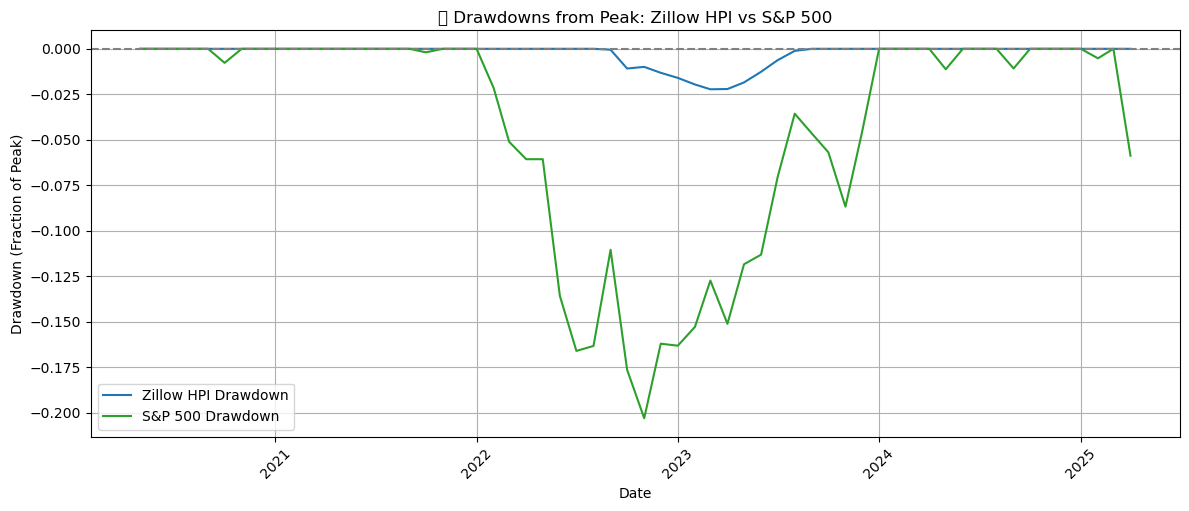

In [20]:
### Visualize Drawdowns (Loss from Peak) - How deep and frequent declines are

# Compute drawdowns (peak to trough decline)
drawdowns = normalized_df / normalized_df.cummax() - 1

# Plot drawdowns
plt.figure(figsize=(12, 5))
plt.plot(drawdowns.index, drawdowns['HPI'], label='Zillow HPI Drawdown', color='tab:blue')
plt.plot(drawdowns.index, drawdowns['SP500'], label='S&P 500 Drawdown', color='tab:green')
plt.title("📉 Drawdowns from Peak: Zillow HPI vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Drawdown (Fraction of Peak)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Seasonality Decomposition (Trend + Seasonal + Residual)
Goal: See how much of the variation in your data is due to:

Long-term trend

Repeating seasonal patterns

Irregular noise

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\859059405.py:14: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


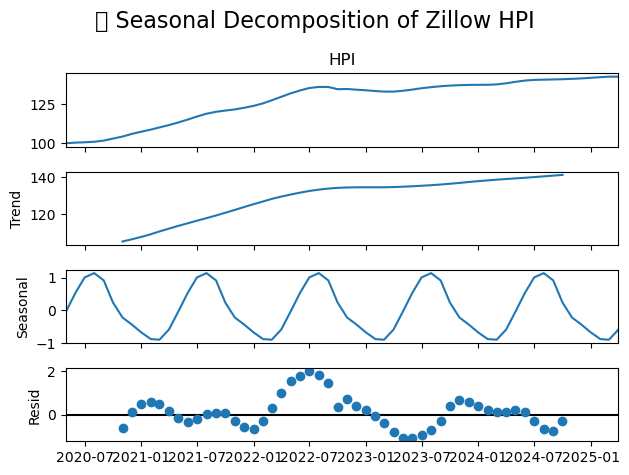

In [21]:
### Code Using seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose

# Make sure HPI index is monthly and complete
hpi_monthly = normalized_df['HPI'].dropna()

# Decompose (model='multiplicative' also works if variance grows)
decomp = seasonal_decompose(hpi_monthly, model='additive', period=12)

# Plot
decomp.plot()
plt.suptitle("🧮 Seasonal Decomposition of Zillow HPI", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_2728\214148523.py:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


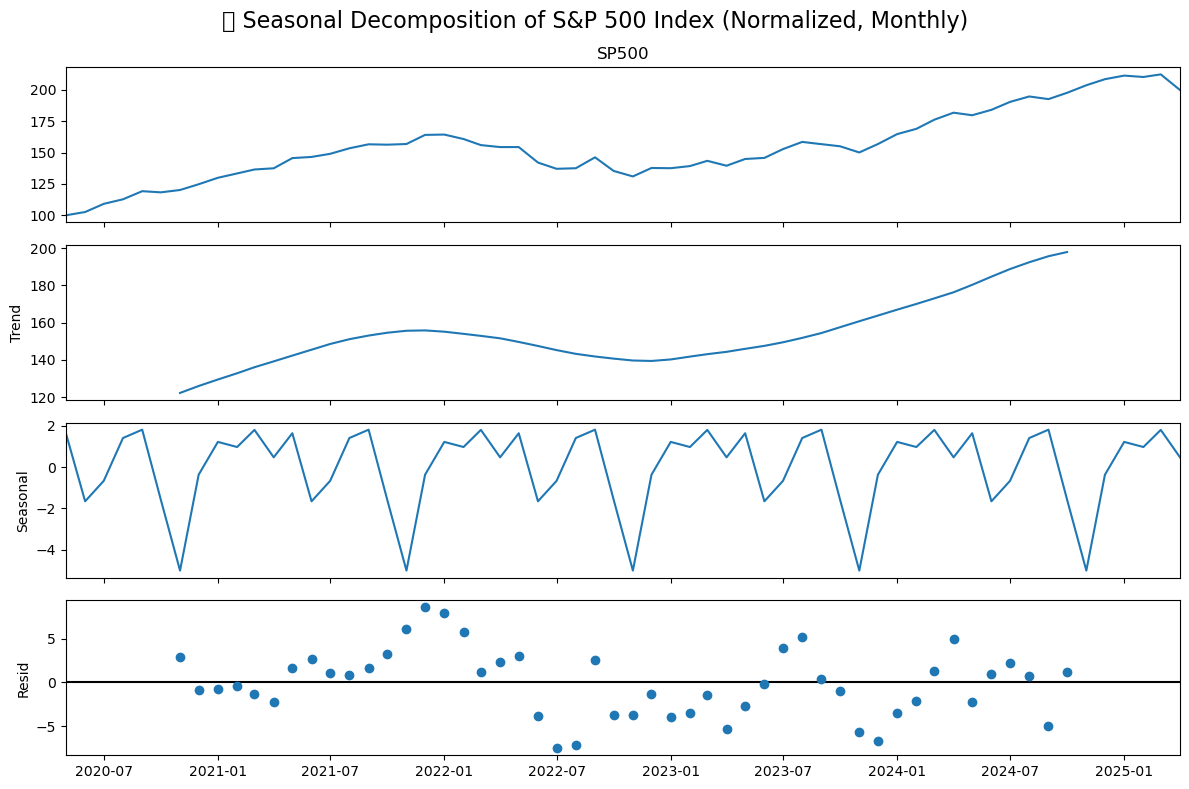

In [22]:
# 📦 Seasonal Decomposition of S&P 500 Index (Monthly)
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Step 1: Extract the normalized S&P 500 series
# Ensure index is datetime and data is monthly
sp500_series = normalized_df['SP500'].dropna()
sp500_series.index = pd.to_datetime(sp500_series.index)

# Step 2: Apply seasonal decomposition with 12-month period (1 year)
# model='additive' assumes linear trend + seasonality
decomposition = seasonal_decompose(sp500_series, model='additive', period=12)

# Step 3: Plot the decomposition: Observed, Trend, Seasonal, Residual
plt.rcParams.update({'figure.figsize': (12, 8)})
decomposition.plot()
plt.suptitle("📉 Seasonal Decomposition of S&P 500 Index (Normalized, Monthly)", fontsize=16)
plt.tight_layout()
plt.show()

### ✅ Interpretation of Seasonal Decomposition

We successfully decomposed both the **S&P 500 Index** and **Zillow HPI** into their components:  
**Trend**, **Seasonality**, and **Residual**.

---

## 📊 S&P 500 (Normalized)

### 🔹 Trend:
- **Average Trend Level**: ~153.7  
- **Range**: Min = 122, Max = 198 → Reflects a **strong upward trend** from 2020 to 2024  
- This shows how the market has nearly **doubled since 2020**

### 🔹 Seasonality:
- **Seasonality amplitude**: ~6.82 points  
- Small seasonal component → Suggests **low repeating monthly cycles**
- S&P 500 is **not strongly seasonal**; fluctuations are mostly driven by market events, not calendar patterns

---

## 🏠 Zillow HPI (Normalized)

### 🔹 Trend:
- **Average Trend Level**: ~129.1  
- **Range**: Min = 105, Max = 141 → Steady growth, but more **stable than S&P 500**
- Reflects **slow, consistent appreciation** in home values

### 🔹 Seasonality:
- **Seasonality amplitude**: ~2.05 points  
- Small seasonal variation → Suggests **mild housing seasonality** (e.g., spring/summer buying activity), but it’s not dominant

---

## 🧠 Summary Table

| Metric           | S&P 500         | Zillow HPI        |
|------------------|------------------|--------------------|
| Trend Strength   | Strong upward    | Steady upward      |
| Volatility       | Higher           | Lower              |
| Seasonality      | Weak (~6.8 pts)  | Very Weak (~2.0 pts)|
| Residual Noise   | More irregular   | More stable        |

---

You’re now fully set up to:
- Proceed with forecasting using ARIMA 📈  